# Logistic Regression from Scratch using Numpy

## Import Numpy and Pandas for Preprocessing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Check Data (pandas)

In [26]:
# Read in Pandas
df = pd.read_csv("creditcard.csv")
df.head()
print("Number of Observations:", len(df))
print("Number of Variables:", len(df.columns))

Number of Observations: 284807
Number of Variables: 31


In [27]:
# Check for Null Columns
null_index = {}
for col in list(df.columns):
    null_index[col] = int(df[col].isnull().sum())

In [28]:
# View Dictionary
null_index

{'Time': 0,
 'V1': 0,
 'V2': 0,
 'V3': 0,
 'V4': 0,
 'V5': 0,
 'V6': 0,
 'V7': 0,
 'V8': 0,
 'V9': 0,
 'V10': 0,
 'V11': 0,
 'V12': 0,
 'V13': 0,
 'V14': 0,
 'V15': 0,
 'V16': 0,
 'V17': 0,
 'V18': 0,
 'V19': 0,
 'V20': 0,
 'V21': 0,
 'V22': 0,
 'V23': 0,
 'V24': 0,
 'V25': 0,
 'V26': 0,
 'V27': 0,
 'V28': 0,
 'Amount': 0,
 'Class': 0}

In [29]:
# Change to Numpy
X_all = df.drop(columns = ["Class"]).values[:, 1:]
y_all = df["Class"].values

## Create Logistic Regression Model

In [30]:
class LogisticRegression():
    def __init__(self, X, y):
        self.X = X
        self.y = y.reshape(-1, 1) # converts from shape (n, ) to (n, 1)
        # add bias col to X
        column_ones = np.ones((X.shape[0], 1))
        self.X = np.concatenate((column_ones, X), axis=1)
        self.weights = np.zeros((X.shape[1]+1, 1)) # gradient shape is (m, 1)
        self.costs = []
        self.initial_cost = 9999999999

    def h(self, X, weights):
        # Calculate hypothesis function using sigmoid
        h = 1/(1+np.exp(-1*np.dot(X, weights)))
        h = np.clip(h, 1e-15, 1 - 1e-15)
        return h

    def cost(self, X, weights):
        # Cost Function
        m = X.shape[0]

        cost = - (1 / m) * sum(self.y * np.log(self.h(X, weights)) + (1 - self.y) * np.log(1 - self.h(X, weights)))
        return cost

    def predict(self, X, weights):
        p = self.h(X, weights)
        p = p >= 0.5
        p = p.astype(int)
        return p

    def grad(self, X, weights):
        # Gradient
        grad = (1 / len(self.y)) * np.dot(X.T, (self.h(X, weights)-self.y))
        return grad

    def gradient_descent(self, iterations, learning_rate, stopping_threshold):
        weights = self.weights
        cost = self.initial_cost # Initialize cost to 999...
        self.costs = [] # Refresh cost history

        for i in range(iterations):
            print("iteration:", i)
            cost_prev = cost # record previous cost

            weights -= learning_rate * self.grad(self.X, weights) # update weights
            cost = float(self.cost(self.X, weights)) # get new cost
            print(cost)
            self.costs.append(cost) # append cost to history

            # Stopping Criteria
            if abs(cost_prev-cost) <= stopping_threshold:
                return
        return

    def plot_gradient_descent(self):
        plt.figure(figsize=(8,6))
        plt.scatter(list(range(len(self.costs))), self.costs)
        plt.plot([0, len(self.costs)], [min(self.costs), max(self.costs)])
        plt.xlabel("Iteration Number")
        plt.ylabel("Cost")
        plt.title("Gradient Descent: Cost vs Iteration")
        plt.show()
        return




## Function Calls

In [31]:
iters = 2000
lr = 0.1
st = 0.00001
model = LogisticRegression(X_all, y_all)
model.gradient_descent(iters, lr, st)
model.plot_gradient_descent

iteration: 0
0.04517769530446104
iteration: 1


/var/folders/_r/ltvwm9y13l5dzz_rnl8w419m0000gn/T/ipykernel_43491/1233287001.py:14: RuntimeWarning: overflow encountered in exp
  h = 1/(1+np.exp(-1*np.dot(X, weights)))
/var/folders/_r/ltvwm9y13l5dzz_rnl8w419m0000gn/T/ipykernel_43491/1233287001.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost = float(self.cost(self.X, weights)) # get new cost


0.0451364754157566
iteration: 2
0.045096234869571296
iteration: 3
0.04505699565718481
iteration: 4
0.045018282703132365
iteration: 5
0.04497982823636549
iteration: 6
0.04494244897370656
iteration: 7
0.04490617342628623
iteration: 8
0.044871032953440304
iteration: 9
0.04483702736864222
iteration: 10
0.04480315440049501
iteration: 11
0.04476884355298909
iteration: 12
0.044735672461162786
iteration: 13
0.044703852900142546
iteration: 14
0.04467343907886575
iteration: 15
0.04464448853780254
iteration: 16
0.04461706147179652
iteration: 17
0.044591219814328883
iteration: 18
0.04456702609850425
iteration: 19
0.044544542134577134
iteration: 20
0.04452380482548013
iteration: 21
0.044504118554344906
iteration: 22
0.0444857675710772
iteration: 23
0.04446898368316403
iteration: 24
0.04445416209633132
iteration: 25
0.044440980129435946
iteration: 26
0.044428999917384596
iteration: 27
0.04441905290225857


<bound method LogisticRegression.plot_gradient_descent of <__main__.LogisticRegression object at 0x134ac4ce0>>

In [32]:
model.plot_gradient_descent

<bound method LogisticRegression.plot_gradient_descent of <__main__.LogisticRegression object at 0x134ac4ce0>>

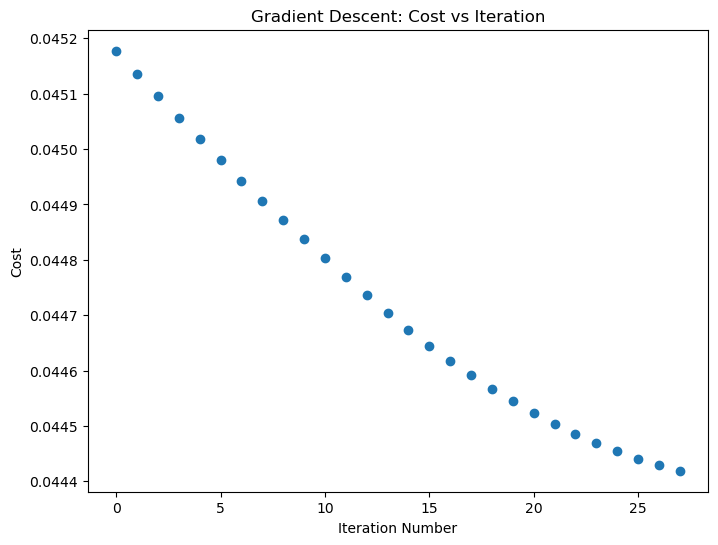

In [33]:
costs = model.costs
plt.figure(figsize=(8,6))
plt.scatter(list(range(len(costs))), costs)
# plt.plot([0, len(costs)], [min(costs), max(costs)])
plt.xlabel("Iteration Number")
plt.ylabel("Cost")
plt.title("Gradient Descent: Cost vs Iteration")
plt.show()